In [1]:
import os
import sys

from tensorflow import keras

module_path = os.path.abspath(os.path.join('..', '..', '..'))

if module_path not in sys.path:
    sys.path.append(os.path.join(module_path))

from functions.augmentation import get_augmentation_layers
from functions.class_weights import calculate_class_weight
from functions.model_running import get_run_number, run_model
from functions.loading_data import load_dataset
from models.xception import get_basic_model

In [2]:
WIDTH = 150
HEIGHT = 150
ROOT = os.path.join('..', '..', '..', '..')
DS_NAME = 'data1'
DATA_DIR = os.path.join(
    ROOT,
    '..',
    DS_NAME,
    'images_original_inception_resnet_v2_150x150_categorized')
MODEL_NAME_BASE = 'xception_3_class_weights'

In [3]:
BATCH_SIZE = 64
dataset = load_dataset(HEIGHT, WIDTH, DATA_DIR, 'training', BATCH_SIZE)
class_weight = calculate_class_weight(dataset, .6)

Found 8015 files belonging to 7 classes.


In [4]:
METRICS = [
    keras.metrics.CategoricalCrossentropy(name='categorical cross entropy'),
    keras.metrics.MeanSquaredError(name='mean squared error'),
    keras.metrics.CategoricalAccuracy(name='accuracy'),
    keras.metrics.AUC(name='auc', multi_label=True),
    keras.metrics.AUC(name='prc', curve='PR', multi_label=True)
]

Found 8015 files belonging to 7 classes.
Found 2000 files belonging to 7 classes.
Epoch 1/100
251/251 [==============================] - ETA: 0s - loss: 4.3064 - categorical cross entropy: 1.1850 - mean squared error: 0.0681 - accuracy: 0.6625 - auc: 0.7414 - prc: 0.2235

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_class_weights_20_1\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_class_weights_20_1\assets


251/251 [==============================] - 73s 255ms/step - loss: 4.3064 - categorical cross entropy: 1.1850 - mean squared error: 0.0681 - accuracy: 0.6625 - auc: 0.7414 - prc: 0.2235 - val_loss: 1.9891 - val_categorical cross entropy: 1.9891 - val_mean squared error: 0.0616 - val_accuracy: 0.6785 - val_auc: 0.8313 - val_prc: 0.3682 - lr: 0.0010
Epoch 2/100
251/251 [==============================] - 50s 199ms/step - loss: 3.1838 - categorical cross entropy: 0.8753 - mean squared error: 0.0575 - accuracy: 0.6913 - auc: 0.8574 - prc: 0.3349 - val_loss: 5.3408 - val_categorical cross entropy: 5.3408 - val_mean squared error: 0.0616 - val_accuracy: 0.7045 - val_auc: 0.7797 - val_prc: 0.3745 - lr: 0.0010
Epoch 3/100
251/251 [==============================] - 50s 198ms/step - loss: 3.2675 - categorical cross entropy: 0.9069 - mean squared error: 0.0591 - accuracy: 0.6926 - auc: 0.8437 - prc: 0.3507 - val_loss: 4.9176 - val_categorical cross entropy: 4.9176 - val_mean squared error: 0.1671 -

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_class_weights_20_4\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_class_weights_20_4\assets


251/251 [==============================] - 63s 252ms/step - loss: 2.9664 - categorical cross entropy: 0.8180 - mean squared error: 0.0565 - accuracy: 0.7085 - auc: 0.8666 - prc: 0.3741 - val_loss: 0.9460 - val_categorical cross entropy: 0.9460 - val_mean squared error: 0.0647 - val_accuracy: 0.6540 - val_auc: 0.8744 - val_prc: 0.3870 - lr: 0.0010
Epoch 5/100
251/251 [==============================] - ETA: 0s - loss: 2.6962 - categorical cross entropy: 0.7478 - mean squared error: 0.0521 - accuracy: 0.7299 - auc: 0.8911 - prc: 0.4522

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_class_weights_20_5\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_class_weights_20_5\assets


251/251 [==============================] - 64s 253ms/step - loss: 2.6962 - categorical cross entropy: 0.7478 - mean squared error: 0.0521 - accuracy: 0.7299 - auc: 0.8911 - prc: 0.4522 - val_loss: 0.6923 - val_categorical cross entropy: 0.6923 - val_mean squared error: 0.0485 - val_accuracy: 0.7555 - val_auc: 0.9047 - val_prc: 0.5397 - lr: 0.0010
Epoch 6/100
251/251 [==============================] - 50s 199ms/step - loss: 2.8261 - categorical cross entropy: 0.7902 - mean squared error: 0.0538 - accuracy: 0.7213 - auc: 0.8818 - prc: 0.4312 - val_loss: 0.7534 - val_categorical cross entropy: 0.7534 - val_mean squared error: 0.0535 - val_accuracy: 0.7085 - val_auc: 0.8944 - val_prc: 0.5164 - lr: 0.0010
Epoch 7/100
251/251 [==============================] - 50s 199ms/step - loss: 2.5698 - categorical cross entropy: 0.7195 - mean squared error: 0.0507 - accuracy: 0.7407 - auc: 0.9020 - prc: 0.4797 - val_loss: 0.7422 - val_categorical cross entropy: 0.7422 - val_mean squared error: 0.0513 -

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_class_weights_20_11\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_class_weights_20_11\assets


251/251 [==============================] - 63s 253ms/step - loss: 2.7407 - categorical cross entropy: 0.7758 - mean squared error: 0.0531 - accuracy: 0.7367 - auc: 0.8941 - prc: 0.4800 - val_loss: 0.6287 - val_categorical cross entropy: 0.6287 - val_mean squared error: 0.0453 - val_accuracy: 0.7715 - val_auc: 0.9215 - val_prc: 0.6429 - lr: 0.0010
Epoch 12/100
251/251 [==============================] - 50s 200ms/step - loss: 2.4966 - categorical cross entropy: 0.7105 - mean squared error: 0.0500 - accuracy: 0.7596 - auc: 0.9065 - prc: 0.5567 - val_loss: 0.7892 - val_categorical cross entropy: 0.7892 - val_mean squared error: 0.0531 - val_accuracy: 0.7420 - val_auc: 0.9004 - val_prc: 0.5773 - lr: 0.0010
Epoch 13/100
251/251 [==============================] - 50s 200ms/step - loss: 2.3731 - categorical cross entropy: 0.6778 - mean squared error: 0.0484 - accuracy: 0.7585 - auc: 0.9181 - prc: 0.5736 - val_loss: 0.6850 - val_categorical cross entropy: 0.6850 - val_mean squared error: 0.0465

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_class_weights_20_20\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_class_weights_20_20\assets


251/251 [==============================] - 64s 255ms/step - loss: 2.0051 - categorical cross entropy: 0.5772 - mean squared error: 0.0425 - accuracy: 0.7894 - auc: 0.9407 - prc: 0.6639 - val_loss: 0.6111 - val_categorical cross entropy: 0.6111 - val_mean squared error: 0.0425 - val_accuracy: 0.7990 - val_auc: 0.9288 - val_prc: 0.6786 - lr: 0.0010
Epoch 21/100
251/251 [==============================] - ETA: 0s - loss: 1.9343 - categorical cross entropy: 0.5604 - mean squared error: 0.0413 - accuracy: 0.7958 - auc: 0.9441 - prc: 0.6904

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_class_weights_20_21\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_class_weights_20_21\assets


251/251 [==============================] - 64s 254ms/step - loss: 1.9343 - categorical cross entropy: 0.5604 - mean squared error: 0.0413 - accuracy: 0.7958 - auc: 0.9441 - prc: 0.6904 - val_loss: 0.5861 - val_categorical cross entropy: 0.5861 - val_mean squared error: 0.0417 - val_accuracy: 0.7915 - val_auc: 0.9366 - val_prc: 0.7220 - lr: 0.0010
Epoch 22/100
251/251 [==============================] - 51s 201ms/step - loss: 2.4018 - categorical cross entropy: 0.6769 - mean squared error: 0.0473 - accuracy: 0.7628 - auc: 0.9150 - prc: 0.5942 - val_loss: 0.8337 - val_categorical cross entropy: 0.8337 - val_mean squared error: 0.0564 - val_accuracy: 0.7280 - val_auc: 0.8767 - val_prc: 0.5270 - lr: 0.0010
Epoch 23/100
251/251 [==============================] - 50s 201ms/step - loss: 2.4371 - categorical cross entropy: 0.6932 - mean squared error: 0.0492 - accuracy: 0.7541 - auc: 0.9129 - prc: 0.5411 - val_loss: 0.7241 - val_categorical cross entropy: 0.7241 - val_mean squared error: 0.0499

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_class_weights_20_36\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_class_weights_20_36\assets


251/251 [==============================] - 63s 250ms/step - loss: 2.0015 - categorical cross entropy: 0.5779 - mean squared error: 0.0417 - accuracy: 0.7945 - auc: 0.9403 - prc: 0.6959 - val_loss: 0.5802 - val_categorical cross entropy: 0.5802 - val_mean squared error: 0.0402 - val_accuracy: 0.8045 - val_auc: 0.9290 - val_prc: 0.7035 - lr: 9.5000e-04
Epoch 37/100
251/251 [==============================] - ETA: 0s - loss: 2.1436 - categorical cross entropy: 0.6015 - mean squared error: 0.0420 - accuracy: 0.7988 - auc: 0.9430 - prc: 0.6880

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_class_weights_20_37\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_class_weights_20_37\assets


251/251 [==============================] - 63s 250ms/step - loss: 2.1436 - categorical cross entropy: 0.6015 - mean squared error: 0.0420 - accuracy: 0.7988 - auc: 0.9430 - prc: 0.6880 - val_loss: 0.5720 - val_categorical cross entropy: 0.5720 - val_mean squared error: 0.0414 - val_accuracy: 0.7975 - val_auc: 0.9301 - val_prc: 0.6998 - lr: 9.5000e-04
Epoch 38/100
251/251 [==============================] - 50s 200ms/step - loss: 2.1841 - categorical cross entropy: 0.6046 - mean squared error: 0.0430 - accuracy: 0.7891 - auc: 0.9363 - prc: 0.6668 - val_loss: 0.7914 - val_categorical cross entropy: 0.7914 - val_mean squared error: 0.0495 - val_accuracy: 0.7655 - val_auc: 0.9181 - val_prc: 0.6318 - lr: 9.5000e-04
Epoch 39/100
251/251 [==============================] - 50s 199ms/step - loss: 2.0454 - categorical cross entropy: 0.5856 - mean squared error: 0.0418 - accuracy: 0.8022 - auc: 0.9404 - prc: 0.6986 - val_loss: 0.6062 - val_categorical cross entropy: 0.6062 - val_mean squared error

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_class_weights_20_56\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_class_weights_20_56\assets


251/251 [==============================] - 63s 251ms/step - loss: 1.3456 - categorical cross entropy: 0.3975 - mean squared error: 0.0301 - accuracy: 0.8524 - auc: 0.9733 - prc: 0.8318 - val_loss: 0.5624 - val_categorical cross entropy: 0.5624 - val_mean squared error: 0.0387 - val_accuracy: 0.8060 - val_auc: 0.9352 - val_prc: 0.7275 - lr: 9.0250e-04
Epoch 57/100
251/251 [==============================] - 50s 200ms/step - loss: 1.3045 - categorical cross entropy: 0.3845 - mean squared error: 0.0296 - accuracy: 0.8539 - auc: 0.9739 - prc: 0.8443 - val_loss: 0.6223 - val_categorical cross entropy: 0.6223 - val_mean squared error: 0.0411 - val_accuracy: 0.8050 - val_auc: 0.9329 - val_prc: 0.7086 - lr: 9.0250e-04
Epoch 58/100
251/251 [==============================] - 50s 200ms/step - loss: 1.2479 - categorical cross entropy: 0.3716 - mean squared error: 0.0285 - accuracy: 0.8584 - auc: 0.9753 - prc: 0.8672 - val_loss: 0.6041 - val_categorical cross entropy: 0.6041 - val_mean squared error

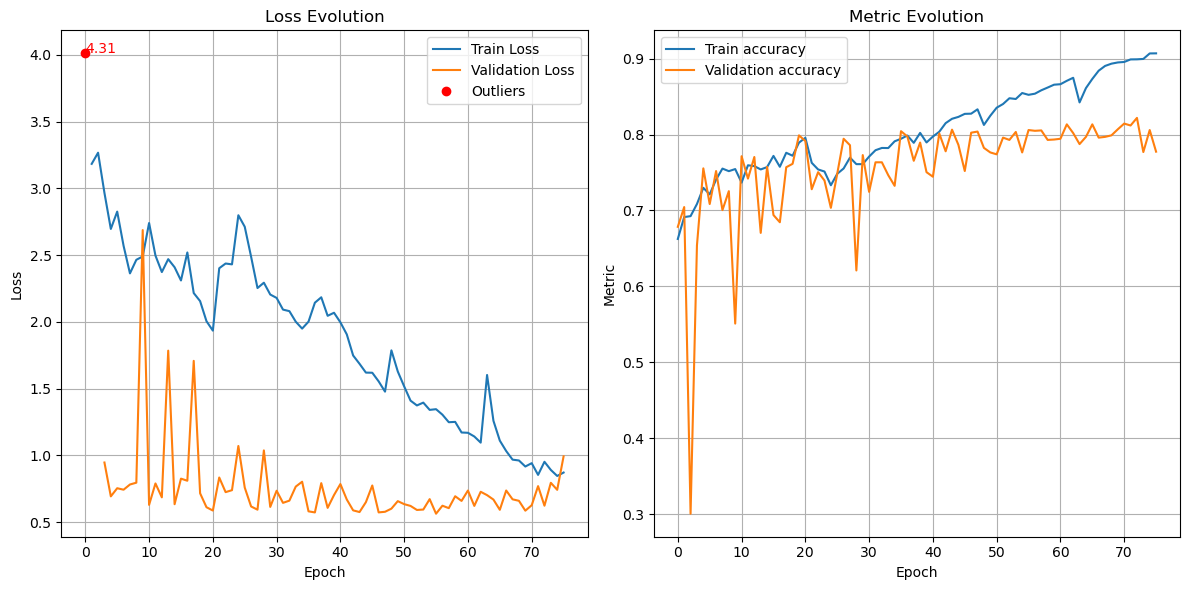

(<keras.engine.functional.Functional at 0x28c6450ed00>,
 <keras.callbacks.History at 0x28c6449f4f0>)

In [5]:
run_model(
    ROOT,
    HEIGHT,
    WIDTH,
    DATA_DIR,
    DS_NAME,
    MODEL_NAME_BASE,
    lambda num_classes:
        lambda: get_basic_model(
            HEIGHT,
            WIDTH,
            num_classes,
            metrics=METRICS),
    get_augmentation_layers,
    class_weight=class_weight)